## Learning using k-Mean Clustering

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
sns.set()

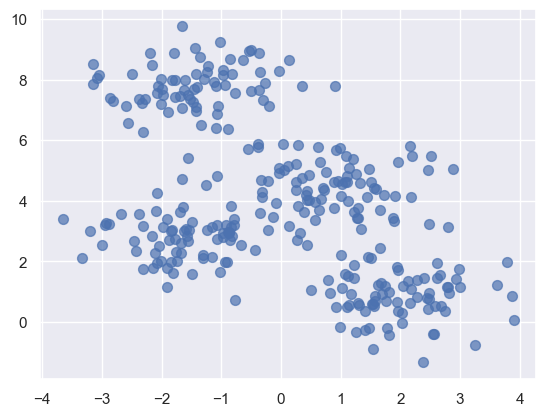

In [126]:
from sklearn.datasets import make_blobs
points, cluster_indexes = make_blobs(n_samples=300, centers=4, cluster_std=0.8, random_state=0)

X=points[:,0]
y=points[:,1]

plt.scatter (X,y, s=50, alpha=0.7)

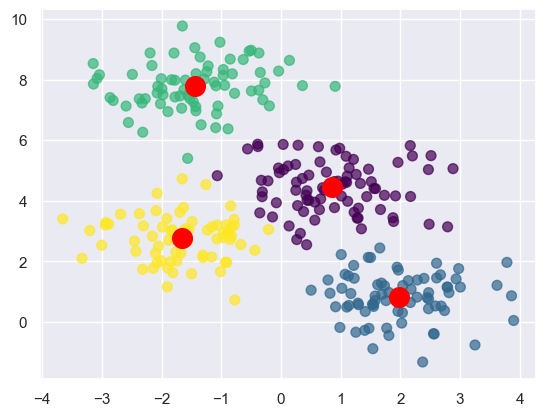

In [127]:
from sklearn.cluster import KMeans

kmeans = KMeans (n_clusters=4, random_state=0)
kmeans.fit(points)
predicted_clusters_indexes = kmeans.predict(points)

plt.scatter (X,y, c=predicted_clusters_indexes, s=50, cmap='viridis', alpha=0.7)

centers = kmeans.cluster_centers_
plt.scatter (centers[:,0], centers[:,1], c='red', s=200)


Accuracy: 0.50


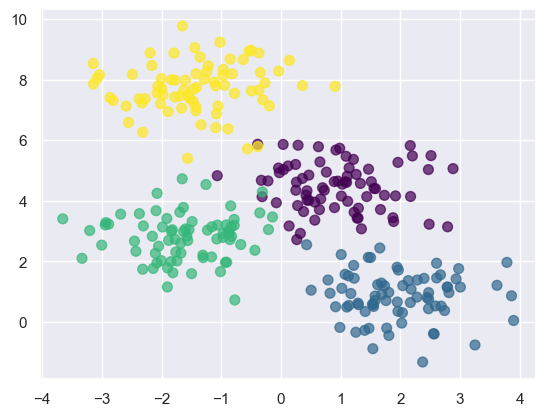

In [128]:
accuracy = np.sum(predicted_clusters_indexes == cluster_indexes) / len (cluster_indexes)
print (f'Accuracy: {accuracy:.2f}')

plt.scatter (X,y, c=cluster_indexes, s=50, cmap='viridis', alpha=0.7)
# Here I found that cluster indexes were shufled during prediction.

In [129]:
import pandas as pd
from scipy.optimize import linear_sum_assignment
conf_mat =pd.crosstab(predicted_clusters_indexes, cluster_indexes, rownames=['Predicted'], colnames=['Actual'])
cm=conf_mat.to_numpy()
# conf_mat, cm

row_ind, col_ind = linear_sum_assignment(-cm)
mapping = dict(zip(row_ind, col_ind))
matched_conf_mat = cm[:, col_ind]
cm, matched_conf_mat

(array([[75,  1,  3,  2],
        [ 0, 74,  0,  0],
        [ 0,  0,  0, 73],
        [ 0,  0, 72,  0]]),
 array([[75,  1,  2,  3],
        [ 0, 74,  0,  0],
        [ 0,  0, 73,  0],
        [ 0,  0,  0, 72]]))

In [130]:
aligned_predictions = np.array([mapping[p] for p in predicted_clusters_indexes])
acc = (cluster_indexes == aligned_predictions).mean()
acc

np.float64(0.98)

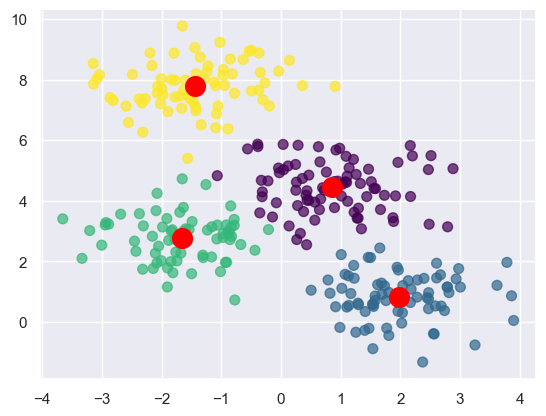

In [131]:
plt.scatter(points[:,0], points[:,1], c=aligned_predictions, cmap='viridis', s=50, alpha=0.7)
plt.scatter (centers[:,0], centers[:,1], c='red', s=200)

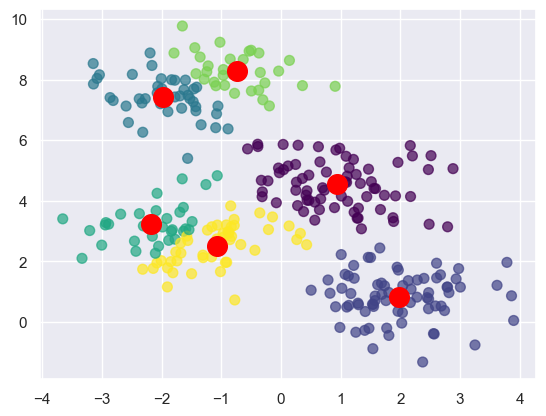

In [132]:
kmeans2= KMeans (n_clusters=6, random_state=0)
kmeans2.fit(points)
predicted_clusters_indexes2 = kmeans2.predict(points)
plt.scatter (X,y, c=predicted_clusters_indexes2, s=50, cmap='viridis', alpha=0.7)
centers2 = kmeans2.cluster_centers_
plt.scatter (centers2[:,0], centers2[:,1], c='red', s=200)

Text(0, 0.5, 'Inertia')

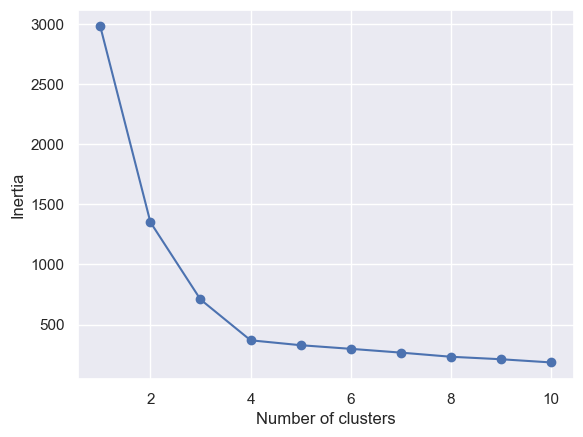

In [133]:
inertias = []

for i in range(1,11):
    kmeans = KMeans (n_clusters=i, random_state=0)
    kmeans.fit(points)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

## Applying k-Means Clustering to Customer Data 

In [140]:
customers =pd.read_csv('Data/customers.csv')
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [160]:
points = customers[ ['Annual Income (k$)', 'Spending Score (1-100)']].to_numpy()
points = customers.iloc[:,3:]
points= points.to_numpy()

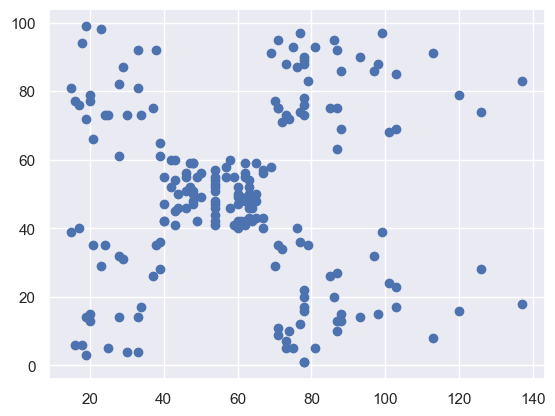

In [163]:
plt.scatter(points[:,0], points[:,1])

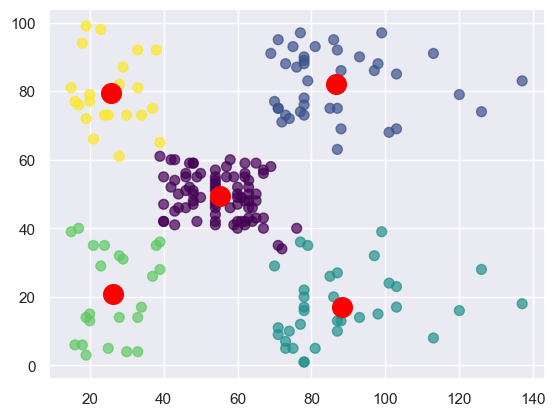

In [ ]:
cluster_customers = KMeans (n_clusters=5, random_state=0)
cluster_customers.fit(points)
predicted_customers= cluster_customers.predict(points)
plt.scatter(points[:,0], points[:,1], c=predicted_customers, cmap='viridis', s=50, alpha=0.7)
centers_customers = cluster_customers.cluster_centers_
plt.scatter (centers_customers[:,0], centers_customers[:,1], c='red', s=200)
